In [17]:
from pl_vect import *
import numpy as np
import math

## F3.1 Pressure

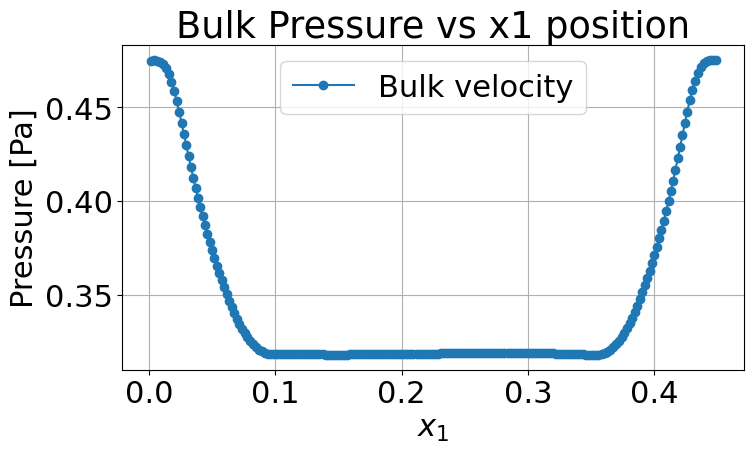

Vb inlet 0.47503920573386516 m/s
Vb outlet 0.4750701748555265 m/s


In [18]:
x2_min = x2_2d[:, 0]
x2_max = x2_2d[:, -1] 


h_x1 = x2_max - x2_min # Height of the channel at each x1 position


integral_V1_dx2 = np.trapz(v1_2d, x=x2_2d, axis=1) # Integrate V1 over x2 for each x1


V_b = integral_V1_dx2 / h_x1 # Calculate bulk velocity profile

x1_position = x1_2d[:, 0]

plt.figure(figsize=(8,5))
plt.plot(x1_position, V_b, 'o-', label='Bulk velocity')
plt.xlabel('$x_1$')
plt.ylabel('Pressure [Pa]')
plt.title('Bulk Pressure vs x1 position')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print('Vb inlet', V_b[0], 'm/s')
print('Vb outlet', V_b[-1], 'm/s')

ΔP_sim: 1.750e+01 Pa
ΔP_Bernoulli:  1.468e-02 Pa


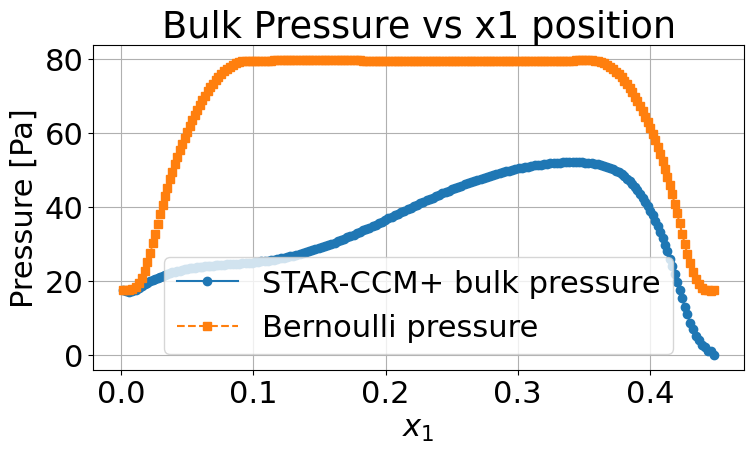

In [19]:
integral_P_dx2 = np.trapz(p_2d, x=x2_2d, axis=1)
P_bulk_sim = integral_P_dx2 / h_x1


# Calculating bernoulli pressure based on bulk velocity
rho = 998   # density of water in kg/m^3
P_ref = P_bulk_sim[0] # reference pressure at inlet
V_ref = V_b[0]  # reference bulk velocity at inlet

P_Bern = P_ref + 0.5 * rho * (V_ref**2 - V_b**2)


# Comparing pressure drops and creating plot
deltaP_sim = P_bulk_sim[0] - P_bulk_sim[-1]
deltaP_bern = P_Bern[0] - P_Bern[-1]
print(f"ΔP_sim: {deltaP_sim:.3e} Pa")
print(f"ΔP_Bernoulli:  {deltaP_bern:.3e} Pa")


plt.figure(figsize=(8,5))
plt.plot(x1_position, P_bulk_sim, 'o-', label='STAR-CCM+ bulk pressure')
plt.plot(x1_position, P_Bern, 's--', label='Bernoulli pressure')
plt.xlabel('$x_1$')
plt.ylabel('Pressure [Pa]')
plt.title('Bulk Pressure vs x1 position')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()





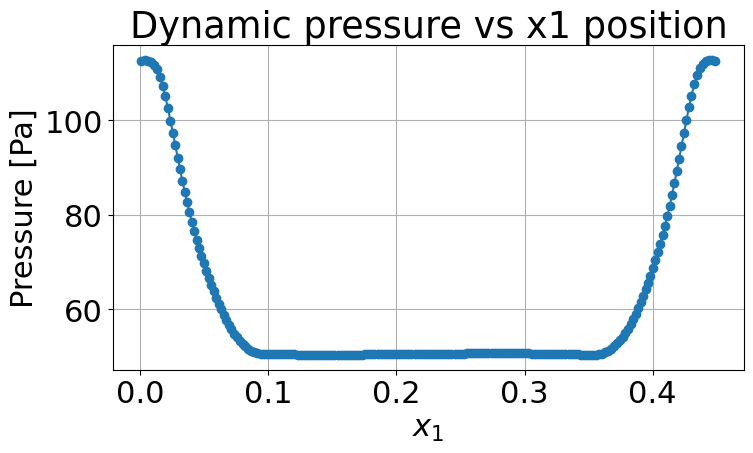

In [20]:
P_dyn = 0.5 * rho * V_b**2

plt.figure(figsize=(8,5))
plt.plot(x1_position, P_dyn, 'o-')
plt.xlabel('$x_1$')
plt.ylabel('Pressure [Pa]')
plt.title('Dynamic pressure vs x1 position')
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
# Given Reynolds number
Re = 37000

# Definining the function
def g(f):
    return 1.0 / math.sqrt(f) - 1.930 * math.log10(Re * math.sqrt(f)) + 0.537

# Secant method implementation
def secant(f0, f1, tol=1e-12, maxiter=100):
    for i in range(maxiter):
        g0, g1 = g(f0), g(f1)
        if abs(g1 - g0) < 1e-16:
            raise RuntimeError("Small denominator in secant method")
        # Secant formula
        f2 = f1 - g1 * (f1 - f0) / (g1 - g0)
        if abs(f2 - f1) < tol:
            print(f"Converged in {i+1} iterations")
            return f2
        f0, f1 = f1, f2
    raise RuntimeError("Secant method did not converge")

# Initial guesses
f_guess1 = 0.01
f_guess2 = 0.03

# Solving for fD
FfacD = secant(f_guess1, f_guess2)
print(f"f_D = {FfacD:.8f}")


H = 151.75e-3  # Height of inlet/outlet (meters)
hmax = 50e-3 # Depth of channel (meters)
R = 192.8e-3 # R in meters
L = 9*hmax
D_h = 2*H 

L = x1_2d[0, 0] - x1_2d[-1, 0]
deltaVbulk = V_b[0]
    
# Calculating pressure drop using Darcy-Weisbach equation
delta_p = FfacD * L *  (rho/ 2) * (deltaVbulk**2 / D_h)
    

print(delta_p, 'Pa')



Converged in 7 iterations
f_D = 0.02236377
-3.7139310125369236 Pa


## F 3.2 Skinfriction

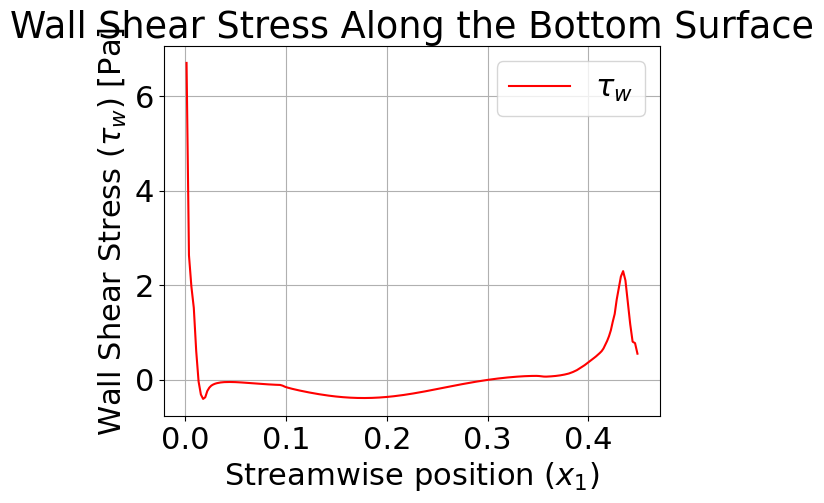

In [22]:
mu = 1.002e-3 # Dynamic viscosity of water at at 20C

dv1_dx2_at_wall = v1_2d[:, 1] / (x2_2d[:, 1] - x2_2d[:, 0]) # Calculating the gradient at the wall using first two points

tau_w = mu * dv1_dx2_at_wall


fig4, ax4 = plt.subplots()
ax4.plot(x1_2d[:, 0], tau_w, 'r-', label='$\\tau_w$')
ax4.set_xlabel("Streamwise position ($x_1$)")
ax4.set_ylabel("Wall Shear Stress ($\\tau_w$) [Pa]")
ax4.set_title("Wall Shear Stress Along the Bottom Surface")
ax4.grid(True)
ax4.legend()
plt.show() 

Data type of wall_shear_stresses_top: float64
Data type of V_b: float64
Data type of wall_shear_stresses_top: float64
Data type of V_b: float64
(200,)


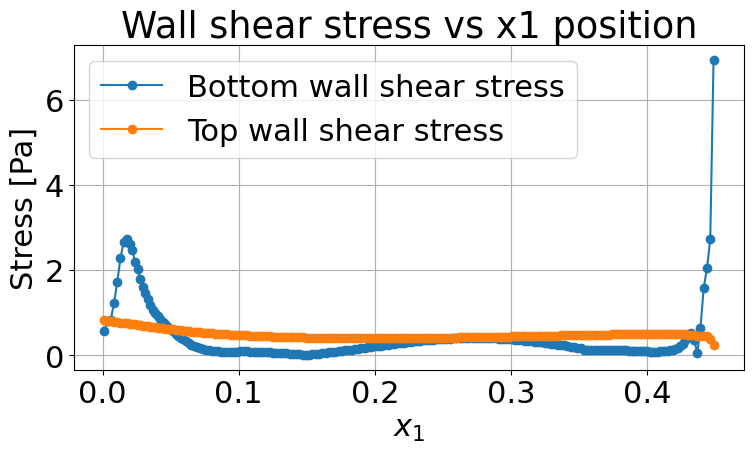

(200,)


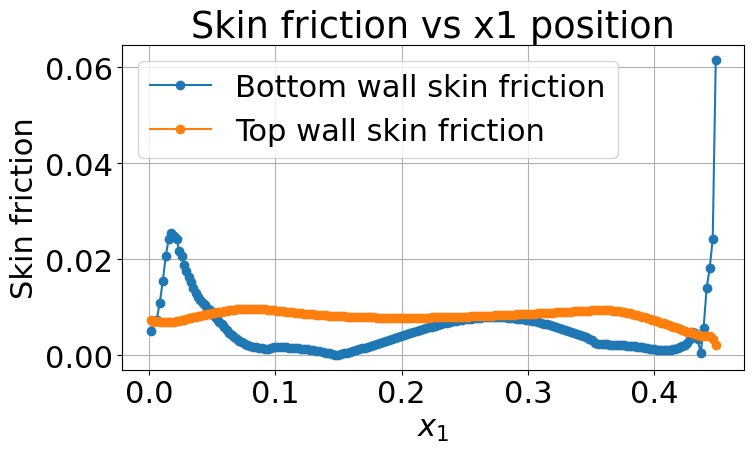

In [23]:
import pandas as pd
import matplotlib.ticker as mticker


column_to_extract = 2 # The third column which contains wall shear stress magnitude


df = pd.read_csv('InternalTableBottom.csv')


wall_shear_stresses_bottom = df.iloc[:, column_to_extract].to_numpy()



print(f"Data type of wall_shear_stresses_top: {wall_shear_stresses_bottom.dtype}")
print(f"Data type of V_b: {V_b.dtype}")

df = pd.read_csv('InternalTableTop.csv')

wall_shear_stresses_top = df.iloc[:, column_to_extract].to_numpy()



print(f"Data type of wall_shear_stresses_top: {wall_shear_stresses_top.dtype}")
print(f"Data type of V_b: {V_b.dtype}")

print(np.shape(wall_shear_stresses_bottom))

plt.figure(figsize=(8,5))
plt.plot(x1_position, wall_shear_stresses_bottom, 'o-', label='Bottom wall shear stress')
plt.plot(x1_position, wall_shear_stresses_top, 'o-', label='Top wall shear stress')
plt.xlabel('$x_1$')
plt.ylabel('Stress [Pa]')
plt.title('Wall shear stress vs x1 position')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Cf_top = np.zeros(len(wall_shear_stresses_top))
Cf_bottom = np.zeros(len(wall_shear_stresses_bottom))

for i in range (len(wall_shear_stresses_top)):
    Cf_top[i] = wall_shear_stresses_top[i] / (0.5 * rho * V_b[i]**2)
    Cf_bottom[i] = wall_shear_stresses_bottom[i] / (0.5 * rho * V_b[i]**2)

print(np.shape(Cf_top))

plt.figure(figsize=(8,5))
plt.plot(x1_position, Cf_bottom, 'o-', label='Bottom wall skin friction')
plt.plot(x1_position, Cf_top, 'o-', label='Top wall skin friction')
plt.xlabel('$x_1$')
plt.ylabel('Skin friction')
plt.title('Skin friction vs x1 position')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()






## F 3.3 Vorticity

omega3 shape: (200, 202)
x1_2d shape: (200, 202)
x2_2d shape: (200, 202)


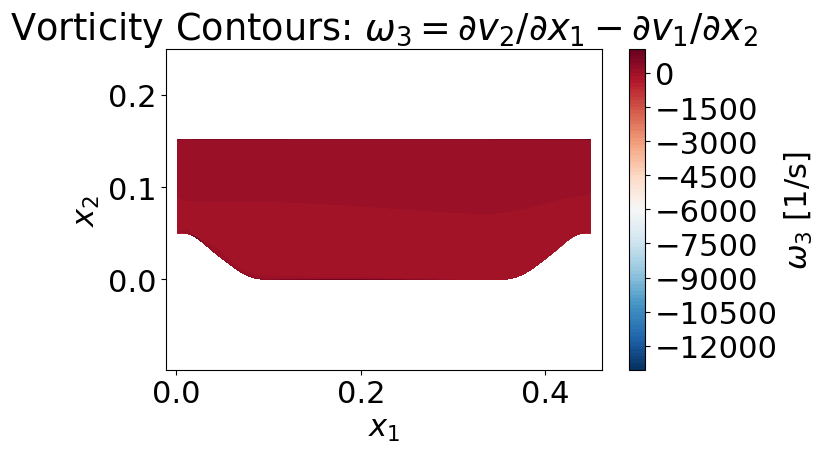

i = 8 Max vorticity at i = 981.2270098312783


In [24]:
vorticity = dv2dx1_2d - dv1dx2_2d # omega3 component of vorticity


print("omega3 shape:", vorticity.shape)

print("x1_2d shape:", x1_2d.shape)
print("x2_2d shape:", x2_2d.shape)


plt.figure(figsize=(8,5))
plt.clf()
contour = plt.contourf(x1_2d, x2_2d, vorticity, 100, cmap='RdBu_r')
plt.colorbar(contour, label=r'$\omega_3$ [1/s]')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title(r'Vorticity Contours: $\omega_3 = \partial v_2 / \partial x_1 - \partial v_1 / \partial x_2$')
plt.axis('equal')
plt.tight_layout()
plt.show()

max_i = np.unravel_index(np.argmax(vorticity, axis=None), vorticity.shape)[0]

print('i =', max_i, 'Max vorticity at i =', np.max(vorticity))

## F 3.4 Turbulent viscosity

array([[0.        , 0.00913181, 0.2385391 , ..., 0.03550859, 0.00095986,
        0.00095986],
       [0.        , 0.00132151, 0.04999127, ..., 0.04558889, 0.00117591,
        0.00117591],
       [0.        , 0.000984  , 0.03792381, ..., 0.04983359, 0.00128578,
        0.00128578],
       ...,
       [0.        , 0.00841572, 0.31528283, ..., 0.03395919, 0.00087492,
        0.00087492],
       [0.        , 0.00853999, 0.32029837, ..., 0.03386431, 0.00087249,
        0.00087249],
       [0.        , 0.00883361, 0.33146037, ..., 0.03409694, 0.00087857,
        0.00087857]])

(200, 202)


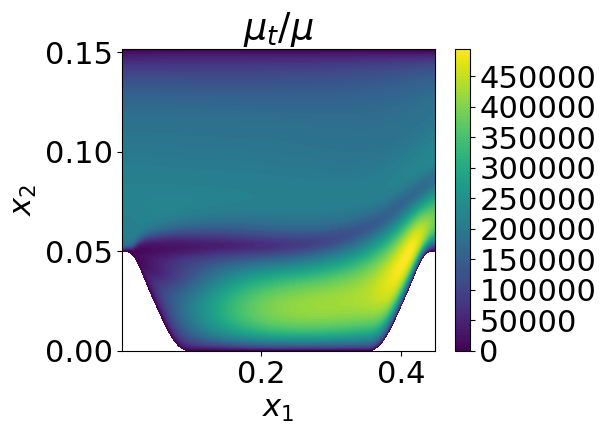

In [25]:
mu_t = vist_2d * rho  # Kinematic viscosity
ratio = mu_t / mu # Turbulent viscosity to dynamic viscosity ratio

display(ratio)
print(np.shape(ratio))

plt.figure("Turbulent Viscosity")
plt.clf()
contour = plt.contourf(x1_2d, x2_2d, ratio, 100, cmap='viridis')
plt.colorbar(contour)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title("$\\mu_t / \\mu$")
#plt.axis('equal')
plt.tight_layout()
plt.show()


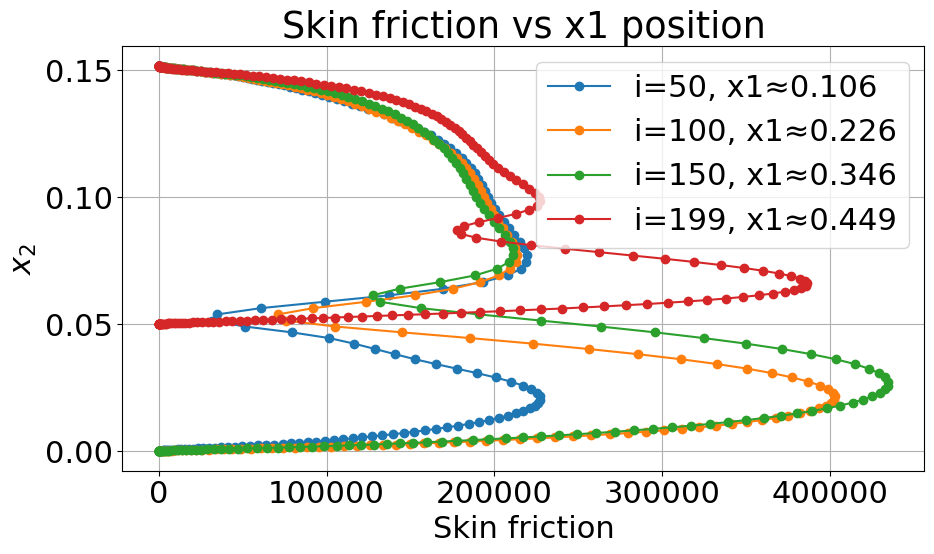

In [26]:
plt.figure(figsize=(10,6))
i = 50
plt.plot(ratio[i,:], x2_2d[i,:], 'o-', label=f'i={i}, x1≈{x1_2d[i,0]:.3f}')
i = 100  
plt.plot(ratio[i,:], x2_2d[i,:], 'o-', label=f'i={i}, x1≈{x1_2d[i,0]:.3f}')  
i = 150
plt.plot(ratio[i,:], x2_2d[i,:], 'o-', label=f'i={i}, x1≈{x1_2d[i,0]:.3f}')  
i = 199
plt.plot(ratio[i,:], x2_2d[i,:], 'o-', label=f'i={i}, x1≈{x1_2d[i,0]:.3f}')  
plt.ylabel('$x_2$')
plt.xlabel('Skin friction')
plt.title('Skin friction vs x1 position')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()



0.001002


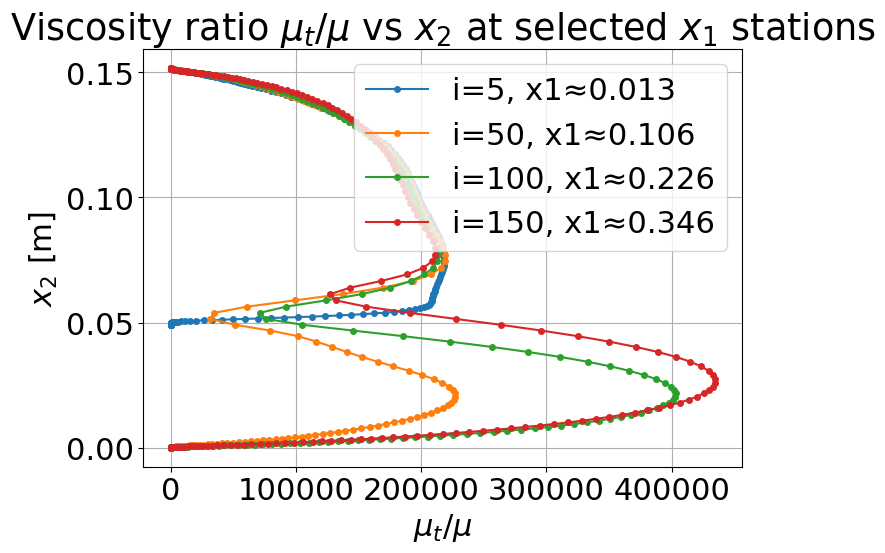

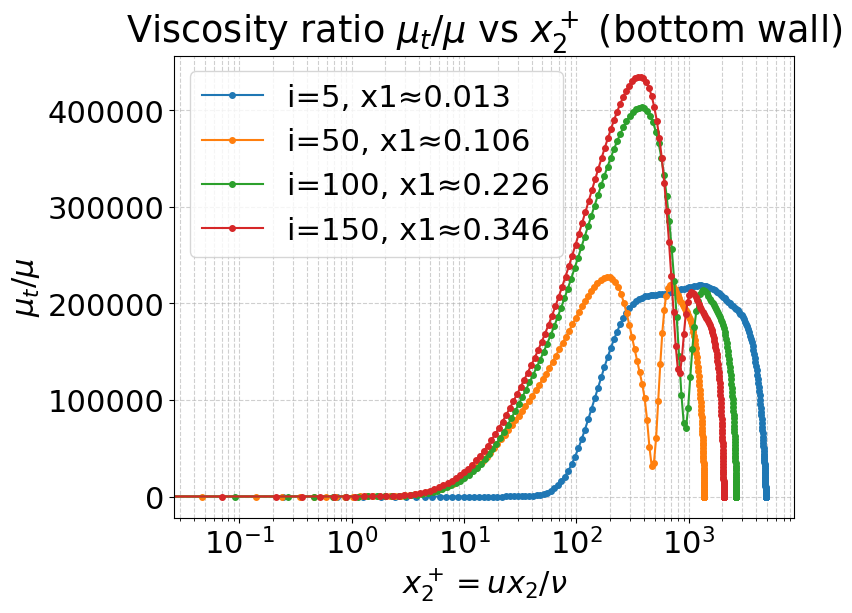

In [27]:
column_to_extract = 0 # The first column which contains Ustar


df = pd.read_csv('InternalTableBottom.csv')


Ustar_bottom= df.iloc[:, column_to_extract].to_numpy()

df = pd.read_csv('InternalTableTop.csv')
Ustar_top= df.iloc[:, column_to_extract].to_numpy()


print(mu)

nu = mu / rho # kinematic viscosity

# Calculating wall-normal distance from bottom wall
x2_wall_dist = x2_2d - x2_2d[:, 0][:, None] # Reshape for broadcasting (ni x nj)

# Calculating x2+ for bottom wall: x2+ = u_tau * x2 / nu
x2plus_bottom = (Ustar_bottom[:, None] * x2_wall_dist) / nu


indices = [5, 50, 100, 150]  # Indices of x1 stations to plot

# Plotting mu_t/mu versus x2 for selected x1 stations
plt.figure(figsize=(8,6))
for i in indices:
    plt.plot(ratio[i, :], x2_2d[i, :], '-o', markersize=4, label=f'i={i}, x1≈{x1_2d[i,0]:.3f}')
plt.xlabel(r'$\mu_t/\mu$')
plt.ylabel(r'$x_2$ [m]')
plt.title(r'Viscosity ratio $\mu_t/\mu$ vs $x_2$ at selected $x_1$ stations')
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Plotting mu_t/mu versus x2+ for selected x1 stations
plt.figure(figsize=(8,6))
for i in indices:
    # sort by x2+ so curve is monotonic
    x2p = x2plus_bottom[i, :].copy()
    y = ratio[i, :].copy()
    order = np.argsort(x2p)
    x2p_s = x2p[order]
    y_s = y[order]
    plt.plot(x2p_s, y_s, '-o', markersize=4, label=f'i={i}, x1≈{x1_2d[i,0]:.3f}')

plt.xscale('log')
plt.xlabel(r'$x_2^+ = ux_2 / \nu$')
plt.ylabel(r'$\mu_t/\mu$')
plt.title(r'Viscosity ratio $\mu_t/\mu$ vs $x_2^+$ (bottom wall)')
plt.grid(True, which='both', ls='--', alpha=0.6)
plt.legend(loc='best')



## F 3.5 Diffusion

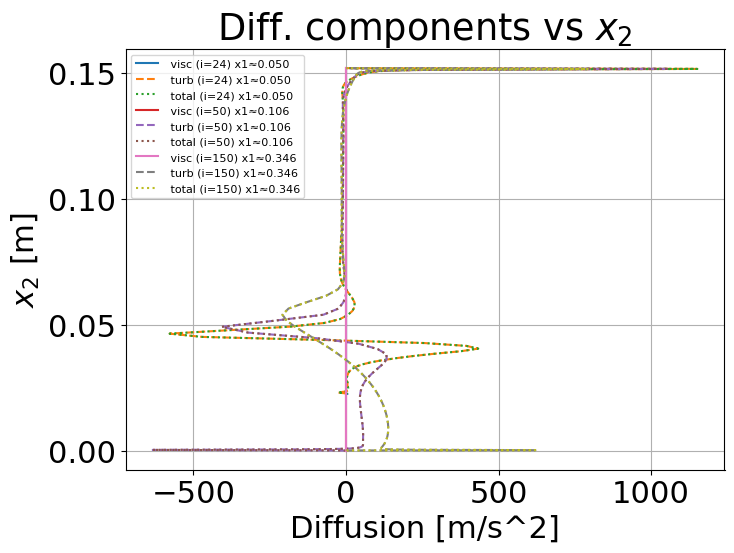

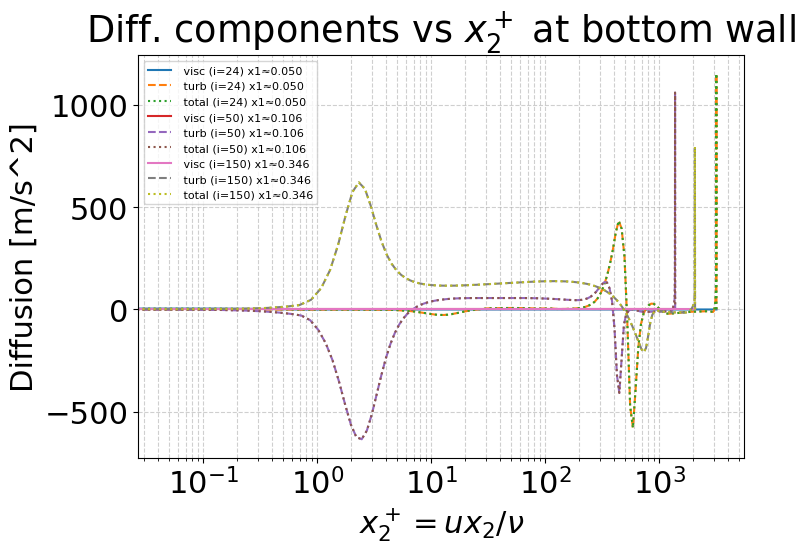

In [36]:
# physical viscosities
nu_t = vist_2d.copy()        # kinematic turbulent viscosity from starccm+

# Calculating the two components of diffusion separately
viscous_component = 2.0 * (nu) * dv1dx1_2d               # 2(ν) * ∂v1/∂x1
turbulent_component = (nu_t) * (dv1dx2_2d + dv2dx1_2d)       # (ν_t) * (∂v1/∂x2 + ∂v2/∂x1)

# Computing divergences
grad_viscous_component, _ = dphidx_dy(x1_2d[0:-1,0:-1], x2_2d[0:-1,0:-1], viscous_component)
_, grad_turbulent_component = dphidx_dy(x1_2d[0:-1,0:-1], x2_2d[0:-1,0:-1], turbulent_component)

# Contributions and total
viscous_component = grad_viscous_component
turbulent_component = grad_turbulent_component
Diffusion_total = viscous_component + turbulent_component


# Choosing i stations (including hill-top)
i_hill = (np.abs(hmax - x1_2d[:,1])).argmin()
indices = [i_hill, 50, 150] # Indices of x1 stations to plot

# Ploting x -y graphs (diffusion vs x2) at selected x1 stations
plt.figure(figsize=(8,6))
for i in indices:
    plt.plot(viscous_component[i,:], x2_2d[i,:], '-', label=f' visc (i={i}) x1≈{x1_2d[i,0]:.3f}')
    plt.plot(turbulent_component[i,:], x2_2d[i,:], '--', label=f' turb (i={i}) x1≈{x1_2d[i,0]:.3f}')
    plt.plot(Diffusion_total[i,:], x2_2d[i,:], ':', label=f' total (i={i}) x1≈{x1_2d[i,0]:.3f}')
plt.xlabel('Diffusion [m/s^2]')
plt.ylabel('$x_2$ [m]')
plt.title('Diff. components vs $x_2$')
plt.grid(True)
plt.legend(loc='best', fontsize=8) 
plt.tight_layout()
plt.show()

# Plotting vs x2+ (bottom wall)
plt.figure(figsize=(8,6))
for i in indices:
    x2p = x2plus_bottom[i,:].copy()
    order = np.argsort(x2p)
    plt.plot(x2p[order], viscous_component[i,:][order], '-', label=f' visc (i={i}) x1≈{x1_2d[i,0]:.3f}')
    plt.plot(x2p[order], turbulent_component[i,:][order], '--', label=f' turb (i={i}) x1≈{x1_2d[i,0]:.3f}')
    plt.plot(x2p[order], Diffusion_total[i,:][order], ':', label=f' total (i={i}) x1≈{x1_2d[i,0]:.3f}')
plt.xscale('log')
plt.xlabel(r'$x_2^+ = ux_2 / \nu$')
plt.ylabel('Diffusion [m/s^2]')
plt.title('Diff. components vs $x_2^+$ at bottom wall')
plt.grid(True, which='both', ls='--', alpha=0.6)
plt.legend(loc='best', fontsize=8) 
plt.tight_layout()
plt.show()

## F 3.6 Production

<Figure size 1400x400 with 0 Axes>

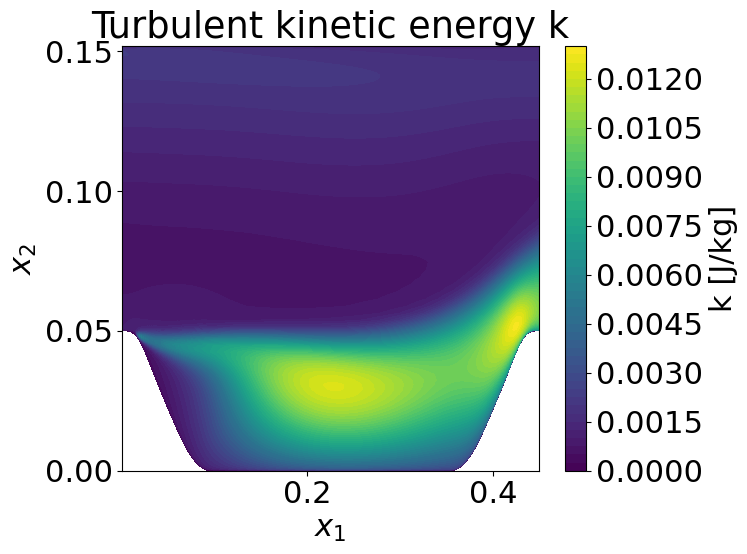

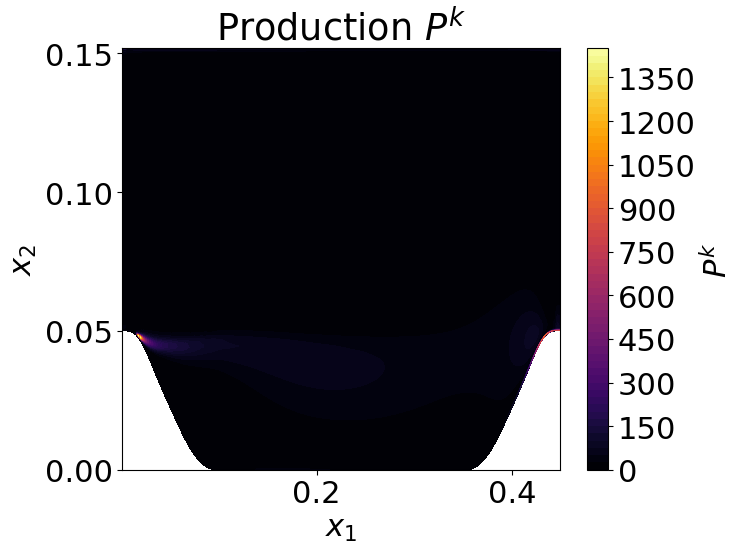

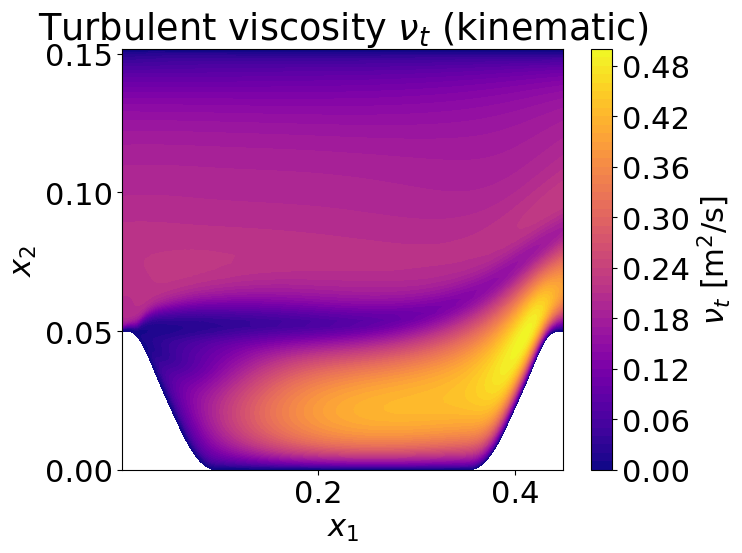

In [29]:
# strain-rate components
s11 = dv1dx1_2d
s22 = dv2dx2_2d
s12 = 0.5 * (dv1dx2_2d + dv2dx1_2d)

# Production: P^k = 2 * nu_t * s_ij s_ij
# Vist_2d is kinematic turbulent viscosity nu_t
Pk = 2.0 * vist_2d * (s11**2 + s22**2 + 2.0 * s12**2)

# contour plots: k, P^k and nu_t
plt.figure(figsize=(14,4))

# Plotting k
plt.figure(figsize=(8, 6))
ax1 = plt.gca()
cf = plt.contourf(x1_2d, x2_2d, te_2d, 60, cmap='viridis')
plt.colorbar(cf, ax=ax1, label='k [J/kg]')
ax1.set_title('Turbulent kinetic energy k')
ax1.set_xlabel('$x_1$'); ax1.set_ylabel('$x_2$')
plt.tight_layout()
plt.show()

# Plotting P^k
plt.figure(figsize=(8, 6))
ax2 = plt.gca()
cf = plt.contourf(x1_2d, x2_2d, Pk, 60, cmap='inferno')
plt.colorbar(cf, ax=ax2, label=r'$P^k$')
ax2.set_title(r'Production $P^k$')
ax2.set_xlabel('$x_1$'); ax2.set_ylabel('$x_2$')
plt.tight_layout()
plt.show()

# Plotting nu_t
plt.figure(figsize=(8, 6)) 
ax3 = plt.gca()
cf = plt.contourf(x1_2d, x2_2d, vist_2d, 60, cmap='plasma')
plt.colorbar(cf, ax=ax3, label=r'$\nu_t$ [m$^2$/s]')
ax3.set_title(r'Turbulent viscosity $\nu_t$ (kinematic)')
ax3.set_xlabel('$x_1$'); ax3.set_ylabel('$x_2$')
plt.tight_layout()
plt.show() 

## F 3.7 Wall boundary conditions for ε

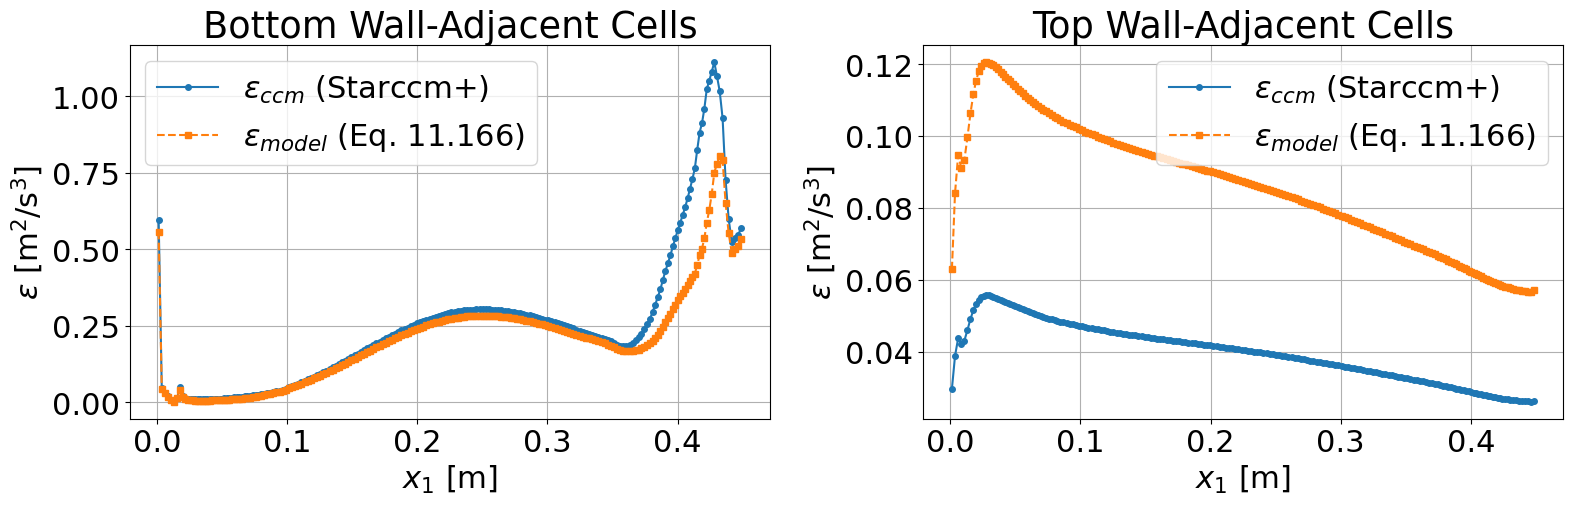

In [32]:
j_bot = 1
j_top = -3  # -1 is the wall, -2 is the first cell inside

# turbulent kinetic energy k and dissipation eps from STAR-CCM+
k_bot = te_2d[:, j_bot].astype(float) # turbulent kinetic energy k for bottom wall
eps_ccm_bot = diss_2d[:, j_bot].astype(float) # dissipation eps for bottom wall

k_top = te_2d[:, j_top].astype(float) # turbulent kinetic energy k for top wall
eps_ccm_top = diss_2d[:, j_top].astype(float) # dissipation eps for top wall


# Calculating the distance from the cell center to the wall boundary
x2_bot = np.abs(x2_2d[:, j_bot] - x2_2d[:, 0]).astype(float)
#x2_top = np.abs(x2_2d[:, 0] - x2_2d[:, j_top]).astype(float)

x2_top = np.abs(x2_2d[:, -1] - x2_2d[:, j_top]).astype(float)

# Calculating eps using equation 11.166
eps_model_bot = 2.0 * nu * k_bot / (x2_bot**2)
eps_model_top = 2.0 * nu * k_top / (x2_top**2)

#print(x2_top)

#print(k_top)

#print(eps_model_bot)

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bottom wall plot
ax1.plot(x1_position, eps_ccm_bot, 'o-', label='$\epsilon_{ccm}$ (Starccm+)', markersize=4)
ax1.plot(x1_position, eps_model_bot, 's--', label='$\epsilon_{model}$ (Eq. 11.166)', markersize=4)
ax1.set_xlabel('$x_1$ [m]')
ax1.set_ylabel(r'$\varepsilon$ [m$^2$/s$^3$]')
ax1.set_title('Bottom Wall-Adjacent Cells')
ax1.legend()
ax1.grid(True)

# Top wall plot
ax2.plot(x1_position, eps_ccm_top, 'o-', label='$\epsilon_{ccm}$ (Starccm+)', markersize=4)
ax2.plot(x1_position, eps_model_top, 's--', label='$\epsilon_{model}$ (Eq. 11.166)', markersize=4)
ax2.set_xlabel('$x_1$ [m]')
ax2.set_ylabel(r'$\varepsilon$ [m$^2$/s$^3$]')
ax2.set_title('Top Wall-Adjacent Cells')
ax2.legend()
ax2.grid(True)

fig1.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## F 3.9

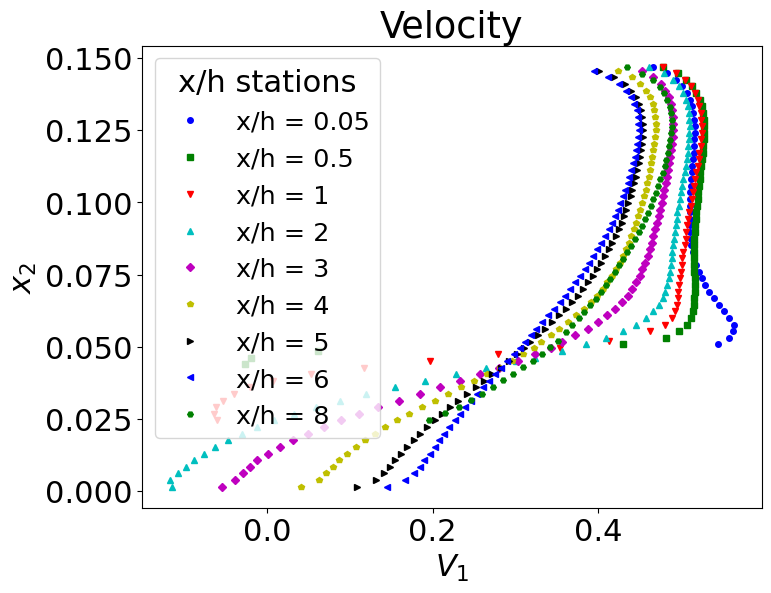

In [31]:

xh2=np.genfromtxt("xh2.xy", comments="%")
y_2=xh2[:,0] # x_2 coordinates, wall-normal direction.
v1_Exp_2=xh2[:,1] # mean velocity in the streamwise direction (x_1) along wall-normal direction (x_2). 


xh3=np.genfromtxt("xh3.xy", comments="%")
y_3=xh3[:,0] # x_2 coordinates, wall-normal direction.
v1_Exp_3=xh3[:,1] # mean velocity in the streamwise direction (x_1) along wall-normal direction (x_2). 


xh4=np.genfromtxt("xh4.xy", comments="%")
y_4=xh4[:,0] # x_2 coordinates, wall-normal direction.
v1_Exp_4=xh4[:,1] # mean velocity in the streamwise direction (x_1) along wall-normal direction (x_2). 


xh5=np.genfromtxt("xh5.xy", comments="%")
y_5=xh5[:,0] # x_2 coordinates, wall-normal direction.
v1_Exp_5=xh5[:,1] # mean velocity in the streamwise direction (x_1) along wall-normal direction (x_2). 


xh6=np.genfromtxt("xh6.xy", comments="%")
y_6=xh6[:,0] # x_2 coordinates, wall-normal direction.
v1_Exp_6=xh6[:,1] # mean velocity in the streamwise direction (x_1) along wall-normal direction (x_2). 


xh8=np.genfromtxt("xh8.xy", comments="%")
y_8=xh8[:,0] # x_2 coordinates, wall-normal direction.
v1_Exp_8=xh8[:,1] # mean velocity in the streamwise direction (x_1) along wall-normal direction (x_2). 


xh05=np.genfromtxt("xh05.xy", comments="%")
y_05=xh05[:,0] # x_2 coordinates, wall-normal direction.
v1_Exp_05=xh05[:,1] # mean velocity in the streamwise direction (x_1) along wall-normal direction (x_2). 


xh005=np.genfromtxt("xh005.xy", comments="%")
y_005=xh005[:,0] # x_2 coordinates, wall-normal direction.
v1_Exp_005=xh005[:,1] # mean velocity in the streamwise direction (x_1) along wall-normal direction (x_2). 



# Creating figure
fig1, ax1 = plt.subplots(figsize=(8, 6))

# Ploting all datasets
ax1.plot(v1_Exp_005, y_005, 'bo', label='x/h = 0.05', markersize=4)
ax1.plot(v1_Exp_05,  y_05,  'gs', label='x/h = 0.5', markersize=4)
ax1.plot(v1_Exp_1,   y_1,   'rv', label='x/h = 1', markersize=4)
ax1.plot(v1_Exp_2,   y_2,   'c^', label='x/h = 2', markersize=4)
ax1.plot(v1_Exp_3,   y_3,   'mD', label='x/h = 3', markersize=4)
ax1.plot(v1_Exp_4,   y_4,   'yp', label='x/h = 4', markersize=4)
ax1.plot(v1_Exp_5,   y_5,   'k>', label='x/h = 5', markersize=4)
ax1.plot(v1_Exp_6,   y_6,   'b<', label='x/h = 6', markersize=4)
ax1.plot(v1_Exp_8,   y_8,   'gH', label='x/h = 8', markersize=4)

# Seting label and title
ax1.set_xlabel("$V_1$")
ax1.set_ylabel("$x_2$")
ax1.set_title("Velocity")
ax1.legend(loc='upper left', title='x/h stations', fontsize='small')

plt.show()